In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [2]:
file           = 'Documents/fortran/n_body.txt'
df             = pd.read_csv('n_body.txt', header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )

/tmp/ipykernel_11212/596376619.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df             = pd.read_csv('n_body.txt', header= None, sep = ',', names = ['mass', 'x', 'y', 'z', 'Fx', 'Fy', 'Fz', 'ax', 'ay', 'az'] )


In [3]:
mass           = df['mass']
x_positions    = df['x']
y_positions    = df['y']
z_positions    = df['z']

x_acceleration = df['ax']
y_acceleration = df['ay']
z_acceleration = df['az']

N              = len(np.unique(mass))
N_x_positions  = [[] for _ in range(N)]
N_y_positions  = [[] for _ in range(N)]
N_z_positions  = [[] for _ in range(N)]

for i in range(len(x_positions)):
    mass_index = np.where(mass[i] == np.unique(mass))[0][0]
    N_x_positions[mass_index].append(x_positions[i])
    N_y_positions[mass_index].append(y_positions[i])
    N_z_positions[mass_index].append(z_positions[i])

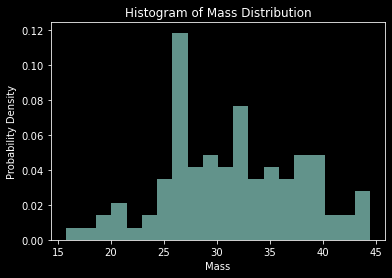

In [44]:
plt.xlabel('Mass')
plt.ylabel('Probability Density')
plt.title('Histogram of Mass Distribution')
plt.style.use('dark_background')
plt.hist(np.log(np.unique(mass)), bins=20, density=True, alpha=0.7);

<Figure size 432x288 with 0 Axes>

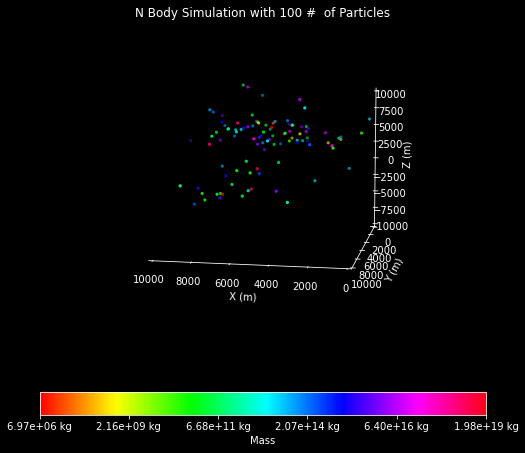

In [51]:
fig           = plt.figure()
fig           = plt.figure(figsize=(8, 8))
ax            = fig.add_subplot(111, projection='3d')

mass          = df['mass']
mass          = np.unique(mass)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

lim           = 10e3
cmap = 'hsv'

ax.set_xlim([0, lim])
ax.set_ylim([0, lim])
ax.set_zlim([-lim, lim])

fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

ax.set_title(f'N Body Simulation with {len(mass)} #  of Particles', color='white')

ax.w_xaxis.line.set_color("white")
ax.w_yaxis.line.set_color("white")
ax.w_zaxis.line.set_color("white")

positions     = np.array([N_x_positions, N_y_positions, N_z_positions])
scatters      = []

def animate(i):

    for scatter in scatters:
        scatter.remove()
    scatters.clear()
    
    scatter   = ax.scatter(positions[0, :, i], positions[1, :, i], positions[2, :, i], c=np.log(mass), cmap = cmap, marker='o', s=5)
    scatters.append(scatter)
    ax.view_init(elev=10., azim= .1 * i) 

    return scatter,

norm          = plt.Normalize(np.min(np.log(mass)), np.max(np.log(mass)))
sm            = plt.cm.ScalarMappable(cmap= cmap, norm=norm)
sm.set_array([])  
cbar          = plt.colorbar(sm, ax=ax, shrink = 1, location = "bottom")
cbar.set_label('Mass', color='white')  


tick_values   = np.linspace(np.min(np.log(mass)), np.max(np.log(mass)), num=6) 
cbar.set_ticks(tick_values)
cbar.set_ticklabels([f"{np.exp(t):.2e} kg" for t in tick_values], color='white') 


num_frames    = len(N_x_positions[0])  
num_particles = len(N_x_positions)   
    
ani           = animation.FuncAnimation(fig, animate, repeat=True, frames=num_frames, interval=100)

writer        = animation.PillowWriter(fps=30,
                                 metadata=dict(artist='Lewis_Adkins'),
                                 bitrate=1800)
ani.save('n_body.gif', writer=writer)

plt.show();